<a href="https://colab.research.google.com/github/roquearmas/pruebasIA/blob/main/Laberinto_Abanico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Crear el MAZE** como un numpy array de 10x10 relleno de ceros

**2 Ponerle los bordes a 0** dibujar los bordes


In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from IPython.display import clear_output

def crear_maze(n,p):
  #n número de filas y columnas
  #p - porcentaje de obstáculos
  matriz_nueva = np.zeros([n, n],dtype = int)
  for i in range(1,n-1):
    for j in range(1,n-1):
      # creo todas las celdas como posibles caminos, celdas transitables
      matriz_nueva[i][j] =127  #CAMINOS
      #creo los bordes (muros)
      if i==0 or j==0 or i==n-1 or j==n-1:
        matriz_nueva[i][j] =0 #MUROS
      ''' para el calculo del porcentaje, hacemos un random entre 1 y el número de filas y columnas del laberinto
          por regla de tres, p es a 100 como p_adaptado es a n*n
          si el número al azar es menor o igual al porcentaje adaptado, ponemos un obstáculo'''
      p_adaptado =p*n*n/100
      if random.randint(0, n*n) < p_adaptado:
        if i!=0 and i!=n-1 and j!=0 and j!=n-1:
          matriz_nueva[i][j] = 25 #OBSTACULOS
  matriz_nueva[1,1]=255 #entrada
  matriz_nueva[n-2,n-2]=176 #salida

  return matriz_nueva


**3 Crea la matriz MARK** copia de MAZE.


In [ ]:
def crear_mark(n):
  matriz_nueva = np.zeros([n,n],dtype = int)
  for i in range(n):
    for j in range(n):
      #creo los bordes
      if i==0 or j==0 or i==99 or j==99:
        matriz_nueva[i][j] =0 #MUROS
  return matriz_nueva



Puedes visualizarla llamando a la siguiente función (importando las
librerías):

In [ ]:
def dibujar_matriz(matriz):
  plt.figure()
  plt.imshow(matriz)
  plt.grid(False)
  plt.show()

4 Crear la matriz de movimiento MOVE


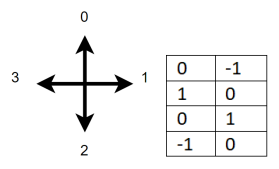

Al añadir las diagonales, los movimientos nuevos serían :

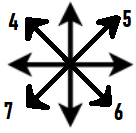 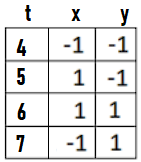

Donde *t* es el movimiento a realizar y *x*, e *y*, las variaciones en la posición que resultan de dicho movimiento.

In [ ]:
def crear_move(diagonales):
  #creo los primeros cuatro movimientos y, como la mitad de los valores son 0, utilizo numpy.zeros
  if diagonales =='S':
    move_new=np.zeros([8,2],dtype=int) # Si se ha elegido la opción de utilizar las diagonales, son 8 movimientos posibles
  else :
    move_new=np.zeros([4,2],dtype=int) # Si no se han elegido las diagonales, sólo son 4
  move_new[0][1]=-1
  move_new[1][0]=1
  move_new[2][1]=1
  move_new[3][0]=-1
  #move= [(0, -1),  (1, 0),(0, 1), (-1, 0)]

  if diagonales =='S':
    # Siguiendo el esquema, añadimos los movimientos en diagonal
    move_new[4][0]=-1
    move_new[4][1]=-1
    move_new[5][0]= 1
    move_new[5][1]=-1
    move_new[6][0]= 1
    move_new[6][1]= 1
    move_new[7][0]=-1
    move_new[7][1]= 1
    #move= [(0, -1),  (1, 0),(0, 1), (-1, 0),(-1,-1),(1,-1),(1,1),(-1,1)]
  return move_new

**5 Crea una clase Agente** con los atributos x e y que almacenan su posición actual y el método mover(2) al que se le pasa un valor de 0 a 3 y modifica sus coordenadas de la manera indicada
en las flechas.


In [ ]:
class Agente:
  def __init__(self, x, y):
    self.x = x
    self.y = y
  def mover(self, t):
      dir_x = move[t][0]
      dir_y = move[t][1]
      self.x += dir_x
      self.y += dir_y

Para la búsqueda en anchura se usa una *Cola* y para el recorrido en profundidad la *Pila*.
En la cola se almacenan las posiciones visitadas, para ello es interesante crear una clase llamada ***Place*** que contendrá los atributos la fila y columna.

In [ ]:
class Place:
  def __init__(self,columna, fila ):
    self.columna = columna
    self.fila = fila
  def mostrar (self):
    print("(" + str(self.columna) + "," + str(self.fila) + ")")

Creo la función ***posicion_visitada (x,y)*** para saber si la búsqueda ha pasado por esa celda


In [ ]:
def posicion_visitada(x,y):
  if mark[x][y] ==0:
    return False
  else:
    return True

Elimino los posibles duplicados que pueda haber en la cola

In [ ]:
def eliminar_duplicados(cola):
  # Convierto la cola a un conjunto.
  conjunto = set(cola)

  # Creo una nueva cola con los elementos del conjunto.
  nueva_cola = deque()
  for elemento in conjunto:
    nueva_cola.append(elemento)
  return nueva_cola

Método para resolver en abanico, o anchura



In [ ]:
def resolver_anchura(maze, mark,move,cola,place, n):
  # Mientras haya elementos en la cola
  while len(cola)>0:
    ''' Sacamos el primer elemento de la cola
    pos_actual es una instancia de la clase Place
    agente es una instancia de la clase Agente '''
    pos_actual = cola.popleft()
    agente= Agente(pos_actual.columna,pos_actual.fila)
    #mark[pos_actual.columna,pos_actual.fila]=127 #entrada
    # Si llegamos a la meta (la última celda)
    if pos_actual.fila == n-2 and pos_actual.columna == n-2: # posición(n-2,n-2) - Salida
        mark[n-2][n-2]=176
        return True
    # Para cada vecino del nodo actual
    agente.x=pos_actual.columna
    agente.y=pos_actual.fila
    for direccion in range(len(move)):
      #guardo la posición antes del movimiento, por si hay que retroceder
      g_old = agente.x
      h_old = agente.y
      agente.mover(direccion)
      g=agente.x
      h=agente.y
      # Si encuentra la salida, lo escribe en mark y devuelve TRUE
      if g==n-2 and h==n-2:
        mark[g][h] = 176 #salida
        return True
      # Si encuentra un muro, lo pinta en MARK
      if (g==0 or h==0 or g==n-1 or h==n-1 ) :
        mark[g][h] = 0 # Muro
      # Si la celda vecina está dentro del laberinto y no ha sido visitada
      if g >= 1 and g <= n-2 and h <= n-2 and h >= 1 and not posicion_visitada(g,h):
        if maze[g][h] == 127: # camino
          # Añado la celda a la cola y lo marco como visitada
          mark[g][h] = maze[g][h]
          pos_actual=Place(g,h)
          cola.append(pos_actual)
          cola=eliminar_duplicados(cola)
          direccion=len(move)-1
        # Si encuentro un obstáculo, lo marco, pero no lo añado a la cola, porque no es una posición desde la que se pueda mover el agente
        if maze[g][h] == 25: # obstáculo
          mark[g][h] = 25
      #devuelvo el agente a la posición inicial, antes de este movimiento, por si quedan movimientos pendientes en el bucle
      agente.x=g_old
      agente.y=h_old
      # redibujo la matriz MARK después de las posibles marcas realizadas
      clear_output(wait=True)
      dibujar_matriz(mark)
  return False


Laberinto resuelto
Rutas intentadas


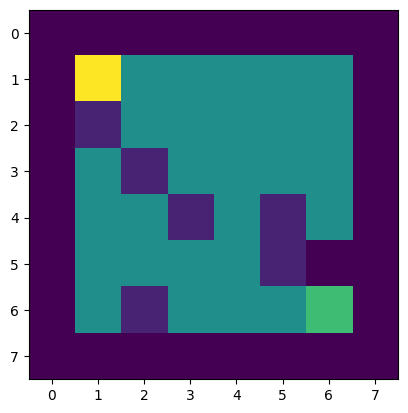

Original: 8x8 16% obstáculos


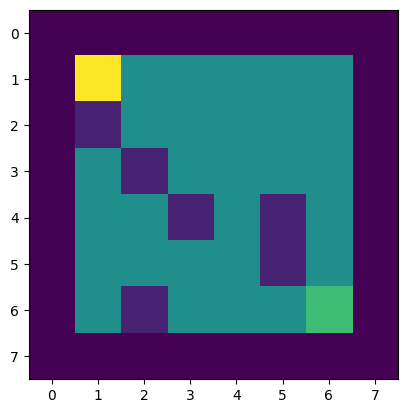

In [ ]:
#programa principal
#filas y columnas
n= int(input('Introduzca las dimensiones n del laberinto (n filas x n columnas):'))
#porcentaje de obstáculos
p =int(input('Introduzca el porcentaje de obstáculos (0-100):' ))
#diagonales
d =str(input('Se permiten las diagonales? (S/N):'))
maze = crear_maze(n,p)
mark =crear_mark(n)
move =crear_move(d)
dibujar_matriz (maze)

# Defino la posición inicial
inicio = Place(1,1)
# Agregamos la posición inicial a la cola
cola = deque()
cola.append (inicio)
# Defino la posición final

#marco la posición inicial en mark, como ya visitada
mark[1][1] =255

#if resolver_anchura(maze, mark, inicio):
if resolver_anchura(maze,mark,move,cola, inicio, n):
  solucion='Laberinto resuelto'
else:
  solucion='El laberinto no se puede resolver'

clear_output(wait=True)
print (solucion)
print('Rutas intentadas')
dibujar_matriz (mark)

print('Original: ' +  str(n) + 'x' + str(n)  + ' ' + str(p) + '% obstáculos')
dibujar_matriz(maze)